In [ ]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 저장
import pickle

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


### MovieLens 데이터 살펴보기

In [ ]:
# 데이터를 읽어온다.
# 일반적인 csv나 tsv가 아니라면 parsers 함수를 이용한다.
columns_name = ['user_id', 'movie_id', 'rating', 'time']

# rating_data = pd.io.parsers.read_csv('data/ratings.dat', names=columns_name,
#                                       delimiter='::')

rating_data = pd.read_csv('data/ratings.dat', delimiter='::', header=None)
rating_data.columns = columns_name
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
movie_data = pd.read_csv('data/movies.dat', delimiter='::', header=None)
movie_data.columns = ['movie_id', 'title', 'genre']
movie_data

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
user_data = pd.read_csv('data/users.dat', delimiter='::', header=None)
user_data.columns = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
user_data

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
rating_data.isna().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [ ]:
movie_data.isna().sum()

movie_id    0
title       0
genre       0
dtype: int64

In [ ]:
user_data.isna().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

### 데이터 분석

#### 년대별 영화 개수를 파악한다.

In [ ]:
# 전체 영화의 개수
print(f'전체 영화의 수 : {len(movie_data)}')

전체 영화의 수 : 3883


In [ ]:
# 중복된 데이터가 존재할 가능성이 있다면...
print(f'중복 제거한 수 : {len(movie_data["movie_id"].unique())}')
print(f'중복 제거한 수 : {len(movie_data["movie_id"].value_counts())}')

중복 제거한 수 : 3883
중복 제거한 수 : 3883


In [ ]:
# 년도별 영화수를 가져온다.

# title 컬럼에서 년도만 가져와 year컬럼으로 추가한다.
a1 = movie_data['title'].apply(lambda x : x[-5:-1])
# year 라는 컬럼으로 추가한다.
movie_data['year'] = a1
movie_data

,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [ ]:
movie_data['year'].value_counts()

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1919      3
1923      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

In [ ]:
# 연대별 영화의 수를 가져온다
a1 = movie_data['title'].apply(lambda x : x[-5:-2] + '0')# 뒷자리 한자리를 빼고 0으로 바꿈
movie_data['year_term'] = a1
movie_data

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,2000
3879,3949,Requiem for a Dream (2000),Drama,2000,2000
3880,3950,Tigerland (2000),Drama,2000,2000
3881,3951,Two Family House (2000),Drama,2000,2000


In [ ]:
# 연대별 영화의 수를 가져온다.
movie_year_term = movie_data['year_term'].value_counts().sort_index()
movie_year_term

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64

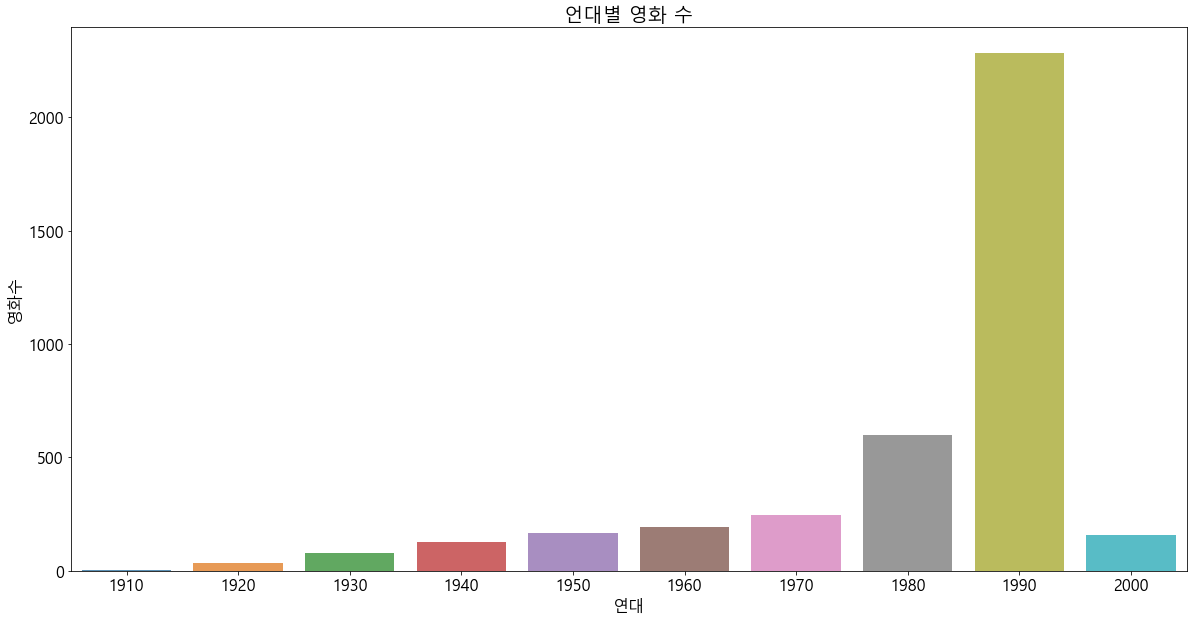

In [ ]:
sns.barplot(movie_year_term.index, movie_year_term.values, alpha=0.8)
plt.title('언대별 영화 수')
plt.xlabel('연대')
plt.ylabel('영화수')
plt.show()

#### 장르별 속성 탐색

In [ ]:
movie_data['genre'].value_counts()

Drama                                            843
Comedy                                           521
Horror                                           178
Comedy|Drama                                     162
Comedy|Romance                                   142
                                                ... 
Comedy|Crime|Mystery|Thriller                      1
Adventure|Animation|Children's|Comedy|Fantasy      1
Action|Adventure|Comedy|Horror                     1
Adventure|Children's|Comedy|Musical                1
Action|Horror|Thriller                             1
Name: genre, Length: 301, dtype: int64

In [ ]:
# 가장 많이 등장한 장르의 속성을 추출한다.

# 장르들을 담을 딕셔너리
unique_genre_dict = {}

# 영화의 수 만큼 반복한다.
for row in movie_data['genre'] :
    # print(row)
    # | 를 기준으로 문자열을 잘라준다.
    parsed_genre = row.split('|')
    # print(parsed_genre)
    # 장르의 수만큼 반복한다.
    for genre_name in parsed_genre :
        # print(genre_name)
        # 현재 장르의 이름으로 저장된 데이터가 없다면..
        if (genre_name in unique_genre_dict) == False :
            # 현재 장르 이름으로 1을 저장한다.
            unique_genre_dict[genre_name] = 1
        # 현재 장르의 이름으로 저장된 데이터가 있다면..
        else :
            # 현재 장르 이름의 데이터를 가져와서 1을 더한 후 덮어 씌운다.
            unique_genre_dict[genre_name] = unique_genre_dict[genre_name] + 1

unique_genre_dict

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

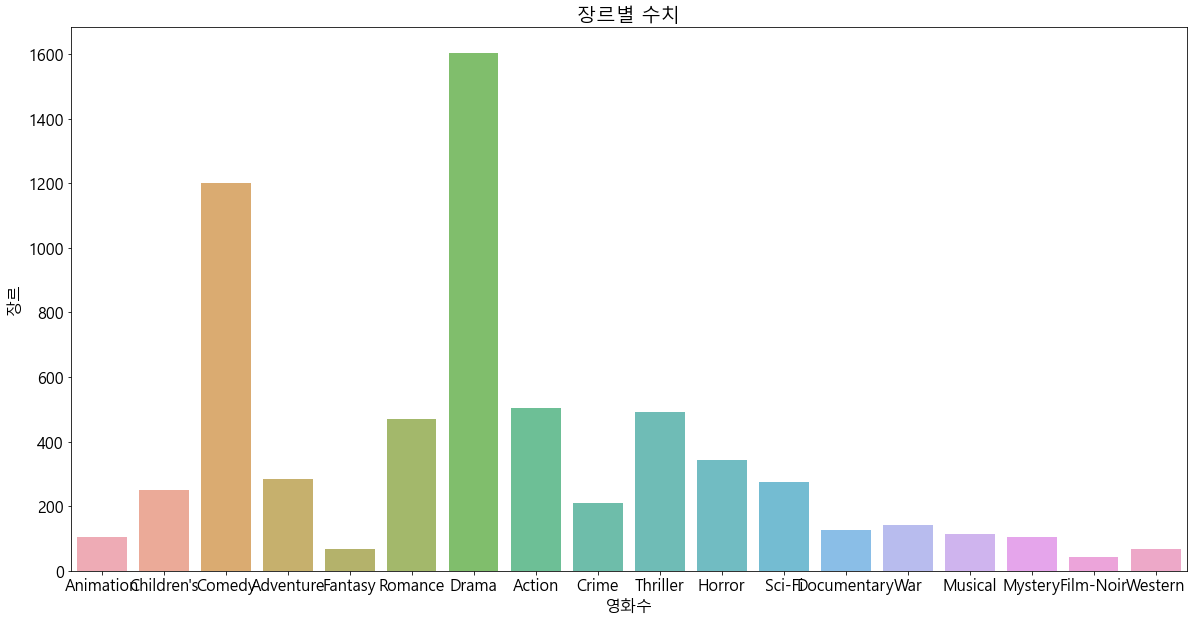

In [ ]:
x = list(unique_genre_dict.keys())
y = list(unique_genre_dict.values())

sns.barplot(x, y, alpha=0.8)
plt.title('장르별 수치')
plt.xlabel('영화수')
plt.ylabel('장르')
plt.show()

### 사용자의 성별 수를 그래프로 시각화한다.

In [ ]:
# 성별 별 사람의 수를 가져온다.
user_gender = user_data['gender'].value_counts()
user_gender

M    4331
F    1709
Name: gender, dtype: int64

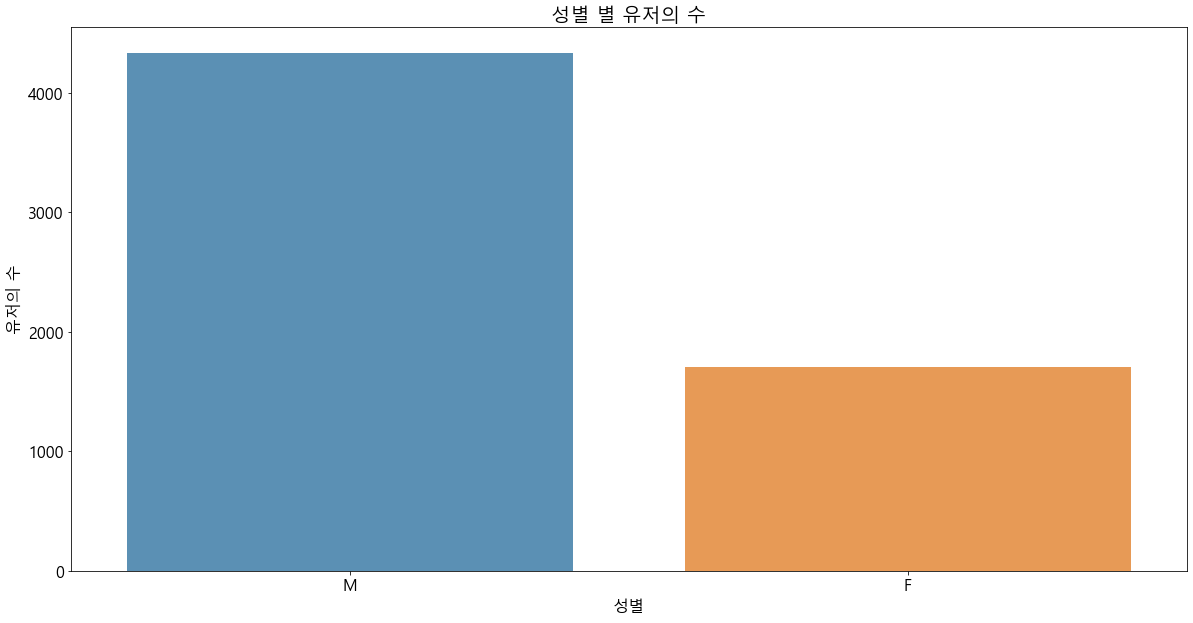

In [ ]:
x = user_gender.index
y = user_gender.values

sns.barplot(x, y, alpha=0.8)
plt.title('성별 별 유저의 수')
plt.xlabel('성별')
plt.ylabel('유저의 수')
plt.show()

### 연령대별 (10, 20, 30 대..) 사용자 수를 그래프로 시각화한다.
- 연령대 값(12 -> 10, 22 -> 20)을 구해 ages라는 컬럼을 만들어 추가해 준다.
- 9세 이하는 outlier라는 문자열로 담아준다.
- 10, 20, 30의 연령대 값은 문자열로 변환해서 담아준다.
- 2시 20분까지 해주시고 2시 30분에 같이 만들어 보겠습니다~

In [ ]:
# age 컬럼을 확인한다.
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
# 나이대를 구한다.
a1 = user_data['age'] // 10 * 10
user_data['ages'] = a1
user_data

,user_id,gender,age,occupation,zipcode,ages
0,1,F,1,10,48067,0
1,2,M,56,16,70072,50
2,3,M,25,15,55117,20
3,4,M,45,7,02460,40
4,5,M,25,20,55455,20
...,...,...,...,...,...,...
6035,6036,F,25,15,32603,20
6036,6037,F,45,1,76006,40
6037,6038,F,56,1,14706,50
6038,6039,F,45,0,01060,40


In [ ]:
# 9세 이하를 outlier로 설정한다.
idx = user_data.query('ages == 0').index
# 숫자형태나 날짜 형태로 변경하고자 한다면 pd.to_numeric이나, pd.to_datetime 
# 함수를 사용한다.
user_data.loc[idx, 'ages'] = 'outlier'
# 문자열 객체로 변환해서 담는다.
user_data['ages'] = user_data['ages'].astype('str')
user_data.loc[1, 'ages']

'50'

In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
 5   ages        6040 non-null   object
dtypes: int64(3), object(3)
memory usage: 283.2+ KB


In [ ]:
# 연령대별 유저수를 구한다.
user_ages = user_data['ages'].value_counts().sort_index()
user_ages

10         1103
20         2096
30         1193
40          550
50          876
outlier     222
Name: ages, dtype: int64

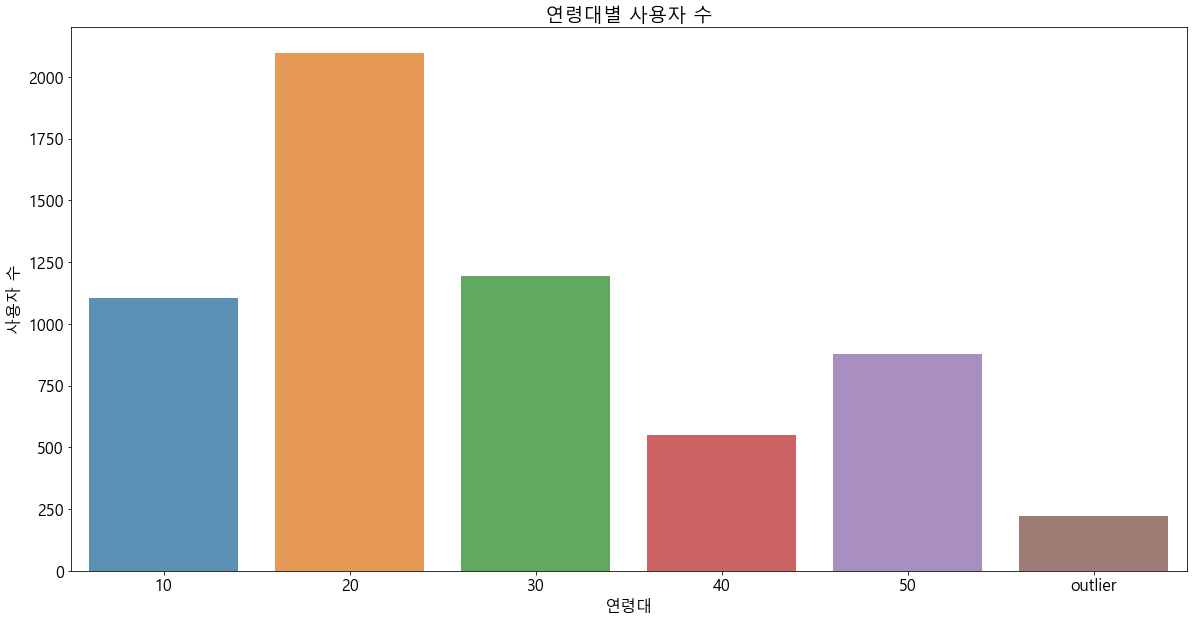

In [ ]:
# 시각화를 한다.
x = user_ages.index
y = user_ages.values

sns.barplot(x, y, alpha=0.8)
plt.title('연령대별 사용자 수')
plt.xlabel('연령대')
plt.ylabel('사용자 수')
plt.show()

### Surprise 사용해보기

In [ ]:
# 추천 관련(pip install surprise)
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [ ]:
# 테스트용 데이터 프레임을 생성한다.
ratings_dict = {
    'item_id' : [1, 2, 3, 1, 2, 3, 2],
    'user_id' : ['a', 'a', 'a', 'b', 'b', 'b', 'c'],
    'rating' : [2, 4, 4, 2, 5, 4, 5]
}
df = pd.DataFrame(ratings_dict)
df

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


- surprise는 사용자구분값, 상품구분값, 평점으로 구성된 데이터를 사용한다.
- 사용자구분값은 user_id, 상품구분값은 item_id, 평점은 rating이라는 이름으로 되어 있어야 하며 user_id, item_id, rating 순으로 되어 있어야 한다.


In [ ]:
# surprise 에서 사용하는 구조로 변환한다.
# 사용자id, 상품id, 평점 순으로 변경한다.
a1 = df[['user_id', 'item_id', 'rating']]
# 데이터를 읽어들일 reader를 생성한다.
# rating_scale : 평점의 최소 최대값 설정
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df=a1, reader=reader)
data

In [ ]:
# 학습용 데이터를 생성한다.
# surprise 라이브러리가 인식할 수 있는 학습 데이터셋 구성
train_data = data.build_full_trainset()
train_data

In [ ]:
# SVD 모델을 통해 학습한다.
model = SVD()
model.fit(train_data)

In [ ]:
# 비어 있는 곳의 평점을 예측한다.
# 본 데이터에서는 a 사용자가 1, 2, 3상품에 대한 평점이 있고
# b 사용자가 1, 2, 3 상품에 대한 평점이 있다.
# 그리고 c 사용자가 2 상품에 대한 평점만 있으므로 c 사용자에 대한
# 1, 3 상품의 평점을 예측하게 된다. 이 때 c 사용자가 2 상품에 대한 
# 평점이 있으므로 다른 사용자와 2 상품의 평점의 유사성 정도를 파악해
# 다른 상품의 평점을 예측하게 된다.
test_data = train_data.build_anti_testset()
predictions = model.test(test_data)
predictions

[Prediction(uid='c', iid=1, r_ui=3.7142857142857144, est=3.569646201491977, details={'was_impossible': False}),
 Prediction(uid='c', iid=3, r_ui=3.7142857142857144, est=3.750072933612553, details={'was_impossible': False})]

In [ ]:
for uid, iid, r_ui, est, _ in predictions :
    print(f'사용자 : {uid}')
    print(f'상품번호 : {iid}')
    print(f'예측평점 : {est}')
    print('-------------------')

사용자 : c
상품번호 : 1
예측평점 : 3.569646201491977
-------------------
사용자 : c
상품번호 : 3
예측평점 : 3.750072933612553
-------------------


### MovieLens 데이터 사용

In [ ]:
# 평점 정보를 확인
rating_data['rating'].agg(['min', 'max'])
# 최소1, 최대5

min    1
max    5
Name: rating, dtype: int64

In [ ]:
# reader 생성
reader = Reader(rating_scale=(1, 5))
# 데이터를 생성한다.
a1 = rating_data[['user_id', 'movie_id', 'rating']]
data = Dataset.load_from_df(a1, reader)
train_data = data.build_full_trainset()
train_data

In [ ]:
# 학습한다.
model = SVD()
model.fit(train_data)

### 예측할 사용자 선정

In [ ]:
# user_id가 4인 유저의 영화 평가 데이터
target_user_id = 4
target_user_data = rating_data.query(f'user_id == {target_user_id}')
target_user_data

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


In [ ]:
# 사용자가 4가 평가한 영화 번호와 평점을 가져온다.
a1 = target_user_data[['movie_id', 'rating']]

target_user_movie_rating_dict = {}

for idx, row in a1.iterrows() :
    # 영화 id를 가져온다.
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
    
target_user_movie_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

In [ ]:
# 4번 사용자가 보지 않은 영화 인덱스를 담아준다.
test_data = []

# 4번 사용자가 본 영화 인덱스
a1 = list(target_user_movie_rating_dict.keys())

# 영화의 수 만큼 반복하면서 영화 id를 가져온다
for movie_id in movie_data['movie_id'] :
    # 영화 id가 4번 사용자가 본 영화가 아니라면..
    if movie_id not in a1 :
        # 현재 영화를 담는다.
        test_data.append((target_user_id, movie_id, 0))

test_data

[(4, 1, 0),
 (4, 2, 0),
 (4, 3, 0),
 (4, 4, 0),
 (4, 5, 0),
 (4, 6, 0),
 (4, 7, 0),
 (4, 8, 0),
 (4, 9, 0),
 (4, 10, 0),
 (4, 11, 0),
 (4, 12, 0),
 (4, 13, 0),
 (4, 14, 0),
 (4, 15, 0),
 (4, 16, 0),
 (4, 17, 0),
 (4, 18, 0),
 (4, 19, 0),
 (4, 20, 0),
 (4, 21, 0),
 (4, 22, 0),
 (4, 23, 0),
 (4, 24, 0),
 (4, 25, 0),
 (4, 26, 0),
 (4, 27, 0),
 (4, 28, 0),
 (4, 29, 0),
 (4, 30, 0),
 (4, 31, 0),
 (4, 32, 0),
 (4, 33, 0),
 (4, 34, 0),
 (4, 35, 0),
 (4, 36, 0),
 (4, 37, 0),
 (4, 38, 0),
 (4, 39, 0),
 (4, 40, 0),
 (4, 41, 0),
 (4, 42, 0),
 (4, 43, 0),
 (4, 44, 0),
 (4, 45, 0),
 (4, 46, 0),
 (4, 47, 0),
 (4, 48, 0),
 (4, 49, 0),
 (4, 50, 0),
 (4, 51, 0),
 (4, 52, 0),
 (4, 53, 0),
 (4, 54, 0),
 (4, 55, 0),
 (4, 56, 0),
 (4, 57, 0),
 (4, 58, 0),
 (4, 59, 0),
 (4, 60, 0),
 (4, 61, 0),
 (4, 62, 0),
 (4, 63, 0),
 (4, 64, 0),
 (4, 65, 0),
 (4, 66, 0),
 (4, 67, 0),
 (4, 68, 0),
 (4, 69, 0),
 (4, 70, 0),
 (4, 71, 0),
 (4, 72, 0),
 (4, 73, 0),
 (4, 74, 0),
 (4, 75, 0),
 (4, 76, 0),
 (4, 77, 0),
 (4, 78,

In [ ]:
# 점수를 예측한다.
target_user_predictions = model.test(test_data)
target_user_predictions

[Prediction(uid=4, iid=1, r_ui=0, est=4.356418804988697, details={'was_impossible': False}),
 Prediction(uid=4, iid=2, r_ui=0, est=3.2264841489749774, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=3.304098190912261, details={'was_impossible': False}),
 Prediction(uid=4, iid=4, r_ui=0, est=2.9155010701022155, details={'was_impossible': False}),
 Prediction(uid=4, iid=5, r_ui=0, est=3.1682079907007656, details={'was_impossible': False}),
 Prediction(uid=4, iid=6, r_ui=0, est=3.8170530991785685, details={'was_impossible': False}),
 Prediction(uid=4, iid=7, r_ui=0, est=3.410201093905248, details={'was_impossible': False}),
 Prediction(uid=4, iid=8, r_ui=0, est=3.269880664737106, details={'was_impossible': False}),
 Prediction(uid=4, iid=9, r_ui=0, est=2.7575059069652372, details={'was_impossible': False}),
 Prediction(uid=4, iid=10, r_ui=0, est=3.5015841224331634, details={'was_impossible': False}),
 Prediction(uid=4, iid=11, r_ui=0, est=3.963151639086306, detai

In [ ]:
# 데이터의 수 만큼 반복한다.
for uid, iid, r_ui, est, _ in target_user_predictions :
    print(f'{iid} : {round(est, 1)}')

1 : 4.4
2 : 3.2
3 : 3.3
4 : 2.9
5 : 3.2
6 : 3.8
7 : 3.4
8 : 3.3
9 : 2.8
10 : 3.5
11 : 4.0
12 : 2.6
13 : 3.5
14 : 3.7
15 : 2.7
16 : 3.6
17 : 4.0
18 : 3.4
19 : 2.8
20 : 2.7
21 : 3.8
22 : 3.3
23 : 2.9
24 : 3.3
25 : 3.6
26 : 3.8
27 : 3.1
28 : 4.2
29 : 3.9
30 : 3.6
31 : 3.2
32 : 4.1
33 : 3.6
34 : 4.0
35 : 3.1
36 : 4.4
37 : 3.7
38 : 2.9
39 : 3.7
40 : 3.9
41 : 4.1
42 : 3.1
43 : 3.7
44 : 2.5
45 : 3.6
46 : 3.3
47 : 4.3
48 : 3.0
49 : 4.0
50 : 4.4
51 : 3.6
52 : 3.9
53 : 4.2
54 : 2.7
55 : 3.4
56 : 3.0
57 : 3.5
58 : 4.1
59 : 3.6
60 : 3.6
61 : 3.1
62 : 3.9
63 : 2.7
64 : 2.5
65 : 2.1
66 : 2.0
67 : 3.6
68 : 3.5
69 : 3.7
70 : 3.0
71 : 2.3
72 : 3.5
73 : 4.1
74 : 3.2
75 : 2.6
76 : 2.9
77 : 4.0
78 : 3.8
79 : 2.8
80 : 3.9
81 : 3.3
82 : 4.0
83 : 4.0
84 : 3.3
85 : 3.7
86 : 3.6
87 : 2.7
88 : 2.9
89 : 3.3
90 : 3.7
92 : 2.9
93 : 2.6
94 : 4.0
95 : 3.0
96 : 4.0
97 : 4.1
98 : 3.2
99 : 3.6
100 : 3.2
101 : 3.8
102 : 2.1
103 : 3.5
104 : 3.1
105 : 3.6
106 : 4.0
107 : 3.2
108 : 3.4
109 : 3.6
110 : 4.1
111 : 4.4
112 : 3

3240 : 3.5
3241 : 3.9
3242 : 3.8
3243 : 2.9
3244 : 3.9
3245 : 4.1
3246 : 4.2
3247 : 3.4
3248 : 2.9
3249 : 3.3
3250 : 3.5
3251 : 3.7
3252 : 3.8
3253 : 3.6
3254 : 3.0
3255 : 3.7
3256 : 3.6
3257 : 3.0
3258 : 3.0
3259 : 3.3
3260 : 3.8
3261 : 3.7
3262 : 3.1
3263 : 3.5
3264 : 3.2
3265 : 4.1
3266 : 3.6
3267 : 3.7
3268 : 1.8
3269 : 3.4
3270 : 3.3
3271 : 3.9
3272 : 3.4
3273 : 2.7
3274 : 3.4
3275 : 3.6
3276 : 2.8
3277 : 3.4
3278 : 3.6
3279 : 3.6
3280 : 3.9
3281 : 4.1
3282 : 3.7
3283 : 3.8
3284 : 3.8
3285 : 3.0
3286 : 2.4
3287 : 2.7
3288 : 3.3
3289 : 4.2
3290 : 3.6
3291 : 3.6
3292 : 3.9
3293 : 3.8
3294 : 3.6
3295 : 3.7
3296 : 4.0
3297 : 3.6
3298 : 3.6
3299 : 2.4
3300 : 3.3
3301 : 3.6
3302 : 3.8
3303 : 3.7
3304 : 3.9
3305 : 3.6
3306 : 4.2
3307 : 4.5
3308 : 3.6
3309 : 3.9
3310 : 4.1
3311 : 3.9
3312 : 3.5
3313 : 2.7
3314 : 3.8
3315 : 3.4
3316 : 3.1
3317 : 4.0
3318 : 3.6
3319 : 3.3
3320 : 3.7
3321 : 3.6
3322 : 3.5
3323 : 3.7
3324 : 3.0
3325 : 2.5
3326 : 3.1
3327 : 3.6
3328 : 4.0
3329 : 4.2
3330 : 3.9

In [ ]:
# 상위 10개의 데이터를 가져온다.
# 예측된 점수를 담을 딕셔너리
predict_dict = {
    'movie_id' : [],
    'rating' : []
}

# 데이터를 추출해 담는다.
for _, movie_id, _ , rating, _ in target_user_predictions :
    predict_dict['movie_id'].append(movie_id)
    predict_dict['rating'].append(round(rating, 1))
    
predict_df  = pd.DataFrame(predict_dict)
predict_df.sort_values(by='rating', inplace=True, ascending=False)
predict_df

,movie_id,rating
1172,1193,4.8
2821,2905,4.8
314,318,4.8
3381,3469,4.8
1220,1250,4.7
...,...,...
1547,1599,1.8
179,181,1.8
1357,1389,1.7
3504,3593,1.6


In [ ]:
# 상위 10개를 가져온다.
a2 = predict_df.head(10)
a2

,movie_id,rating
1172,1193,4.8
2821,2905,4.8
314,318,4.8
3381,3469,4.8
1220,1250,4.7
738,750,4.7
885,899,4.7
521,527,4.7
845,858,4.7
1237,1267,4.7


In [ ]:
# 상위 10개를 반복한다.
for mid in a2['movie_id'] :
    # 영화 제목을 가져온다.
    idx1 = movie_data.query(f'movie_id == "{mid}"').index
    movie_title = movie_data.loc[idx1, 'title']
    # print(movie_title.values[0])
    
    # 평점 정보를 가져온다.
    idx2 = a2.query(f'movie_id == "{mid}"').index
    movie_rating = a2.loc[idx2, 'rating']
    # print(movie_rating.values[0])
    
    print(f'영화제목 : {movie_title.values[0]}')
    print(f'예상평점 : {movie_rating.values[0]}')
    print('-------------------------------------')

영화제목 : One Flew Over the Cuckoo's Nest (1975)
예상평점 : 4.8
-------------------------------------
영화제목 : Sanjuro (1962)
예상평점 : 4.8
-------------------------------------
영화제목 : Shawshank Redemption, The (1994)
예상평점 : 4.8
-------------------------------------
영화제목 : Inherit the Wind (1960)
예상평점 : 4.8
-------------------------------------
영화제목 : Bridge on the River Kwai, The (1957)
예상평점 : 4.7
-------------------------------------
영화제목 : Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
예상평점 : 4.7
-------------------------------------
영화제목 : Singin' in the Rain (1952)
예상평점 : 4.7
-------------------------------------
영화제목 : Schindler's List (1993)
예상평점 : 4.7
-------------------------------------
영화제목 : Godfather, The (1972)
예상평점 : 4.7
-------------------------------------
영화제목 : Manchurian Candidate, The (1962)
예상평점 : 4.7
-------------------------------------


### 연습 문제

- 각 사용자별 평점 평균을 구한다.
- 각 영화별 평점 평균을 구한다.
- 남자들의 영화 평점 평균을 구한다.
- 여자들의 영화 평점 평균을 구한다.
- 장르가 Comedy인 영화의 평점 평균을 구한다.
- 1990년대에 제작된 영화의 평점 평균을 구한다.

#### 각 사용자별 평점 평균을 구한다.

In [ ]:
rating_data.groupby('user_id')['rating'].mean()

user_id
1       4.188679
2       3.713178
3       3.901961
4       4.190476
5       3.146465
          ...   
6036    3.302928
6037    3.717822
6038    3.800000
6039    3.878049
6040    3.577713
Name: rating, Length: 6040, dtype: float64

#### 각 영화별 평점 평균을 구한다.

In [ ]:
a1 = rating_data.groupby('movie_id')['rating'].mean()
a2 = a1.reset_index()
# 평점 평균 결과와 movie_data를 합친 것을 생성한다.
merge_df = pd.merge(movie_data, a2, left_on='movie_id', right_on='movie_id')
merge_df[['title', 'rating']].sort_values(by='rating', ascending=False)

,title,rating
926,Schlafes Bruder (Brother of Sleep) (1995),5.0
3635,Bittersweet Motel (2000),5.0
1652,Follow the Bitch (1998),5.0
3152,Song of Freedom (1936),5.0
744,"Gate of Heavenly Peace, The (1995)",5.0
...,...,...
774,Diebinnen (1995),1.0
3006,Wirey Spindell (1999),1.0
2638,White Boys (1999),1.0
2989,"Loves of Carmen, The (1948)",1.0


#### 각 성별별 영화 평점 평균을 구한다.

In [ ]:
# user_data와 rating_data를 병합한 것을 생성한다.
merge_df = pd.merge(user_data, rating_data, left_on='user_id', right_on='user_id')
merge_df

,user_id,gender,age,occupation,zipcode,ages,movie_id,rating,time
0,1,F,1,10,48067,outlier,1193,5,978300760
1,1,F,1,10,48067,outlier,661,3,978302109
2,1,F,1,10,48067,outlier,914,3,978301968
3,1,F,1,10,48067,outlier,3408,4,978300275
4,1,F,1,10,48067,outlier,2355,5,978824291
...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,20,1091,1,956716541
1000205,6040,M,25,6,11106,20,1094,5,956704887
1000206,6040,M,25,6,11106,20,562,5,956704746
1000207,6040,M,25,6,11106,20,1096,4,956715648


In [ ]:
# 성별별 영화 평점을 구한다.
a1 = merge_df.groupby('gender')['rating'].mean()
a1

gender
F    3.620366
M    3.568879
Name: rating, dtype: float64

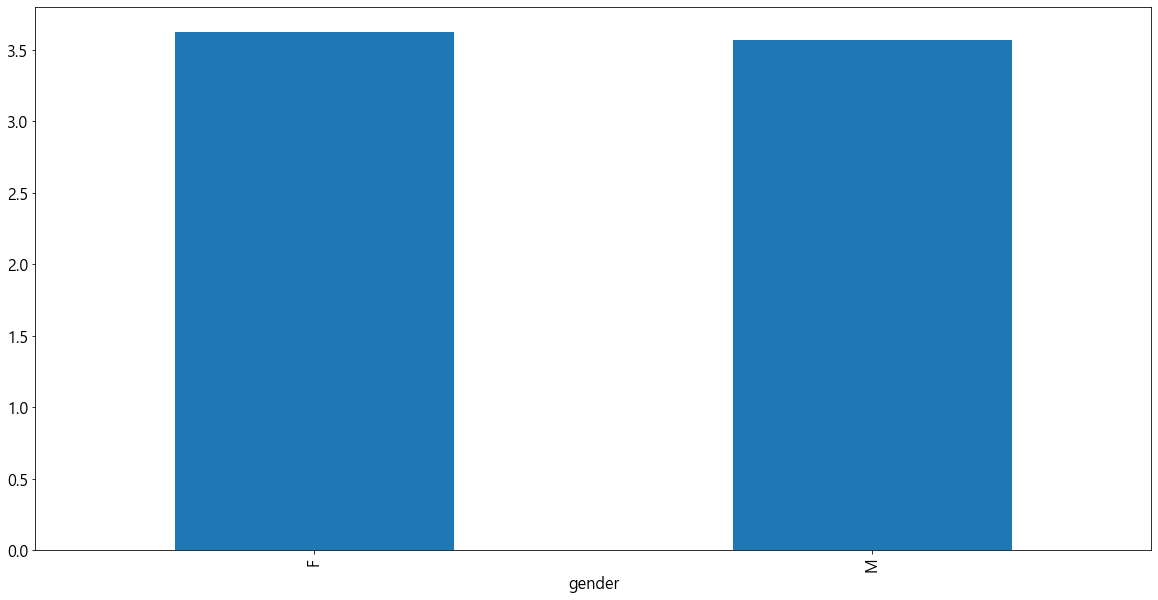

In [ ]:
a1.plot.bar()
plt.show()

### 장르가 Comedy인 영화의 평점 평균을 구한다.

In [ ]:
# movie_data와 rating_data를 합친 것을 생성한다.
merge_df = pd.merge(movie_data, rating_data, left_on='movie_id', right_on='movie_id')
merge_df

,movie_id,title,genre,year,year_term,user_id,rating,time
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,10,5,978226474
...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5927,1,979852537


In [ ]:
# genre에 Comedy라는 문자열이 존재하는지 여부 값을 가져온다.
a1 = merge_df['genre'].str.contains('Comedy')
# 해당하는 값들만 가져온다.
result_df = merge_df[a1]
result_df

,movie_id,title,genre,year,year_term,user_id,rating,time
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,10,5,978226474
...,...,...,...,...,...,...,...,...
999418,3948,Meet the Parents (2000),Comedy,2000,2000,5938,4,1002297887
999419,3948,Meet the Parents (2000),Comedy,2000,2000,5949,2,985052813
999420,3948,Meet the Parents (2000),Comedy,2000,2000,5950,4,1046369637
999421,3948,Meet the Parents (2000),Comedy,2000,2000,5972,2,986916093


In [ ]:
# 평점 평균을 구한다.
result_df['rating'].mean()

3.522098827752538

### 1990년대에 제작된 영화의 평점 평균을 구한다.

In [ ]:
# movie_data와 rating_data를 합친다.
merge_df = pd.merge(movie_data, rating_data, left_on='movie_id', right_on='movie_id')
merge_df

,movie_id,title,genre,year,year_term,user_id,rating,time
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,10,5,978226474
...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,2000,2000,5927,1,979852537


In [ ]:
# year_term이 1990 인것을 가져온다.
movie_1990_df = merge_df.query('year_term == "1990"')
movie_1990_df

,movie_id,title,genre,year,year_term,user_id,rating,time
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990,10,5,978226474
...,...,...,...,...,...,...,...,...
998253,3942,Sorority House Massacre II (1990),Horror,1990,1990,2491,1,974132390
998254,3942,Sorority House Massacre II (1990),Horror,1990,1990,2635,5,973588747
998255,3942,Sorority House Massacre II (1990),Horror,1990,1990,2694,4,973313181
998256,3942,Sorority House Massacre II (1990),Horror,1990,1990,4260,2,972109348


In [ ]:
# 평점 평균을 구한다.
movie_1990_df['rating'].mean()

3.4667303502157294